# Positional Spending Data
**Name:** Jaime Avendaño  
**Date:** 5/21/2021  
<br>
This notebook takes the positional spending data and does feature engineering by normalizing the spending. All values are compared to the NFL Salary Cap for the given year.  
<br>
The salary cap for each team can vary slightly, since there is an amount that can be rolled over. Also, these numbers don't count the dead money from old contracts or released players. But by comparing it to a single number for a year, we can get a relative percentage that can be compared across teams and years.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mtick
import seaborn as sns

import janitor

In [2]:
df = pd.read_parquet('nfl_df.parquet')
df.head()

,team,qb,rb,wr,te,ol,offense,idl,edge,lb,s,cb,defense,year,cap
0,Eagles,13385137,10203112,19241989,5509036,25664899,74004173,5264666,10241101,10004817,6920158,6032738,38463480,2013,123000000.0
1,Seahawks,1557085,10799653,16831423,12778788,27955261,69922210,7701509,25013832,7377232,8579619,3507877,52180069,2013,123000000.0
2,Titans,6336958,15376098,12686896,6979500,26721984,68101436,6496528,8776293,5740835,10777066,9602477,41393199,2013,123000000.0
3,Broncos,18716295,5070632,10120554,8013902,24318758,66240141,6880138,5313554,12951882,5894346,17559225,48599145,2013,123000000.0
4,Giants,21998400,5036739,8677626,2998913,24235900,62947578,5118995,9523813,7916847,12704990,11202110,46466755,2013,123000000.0


In [70]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=0.35)

In [3]:
df['total'] = df['offense'] + df['defense']

In [4]:
positions = df.columns[1:-3]
positions_pct = [f'{pos}_pct' for pos in positions if pos not in ['defense', 'offense']]
for pos in positions:
    df[f'{pos}_pct'] = df[pos] / df.cap
df.head()

,team,qb,rb,wr,te,ol,offense,idl,edge,lb,...,wr_pct,te_pct,ol_pct,offense_pct,idl_pct,edge_pct,lb_pct,s_pct,cb_pct,defense_pct
0,Eagles,13385137,10203112,19241989,5509036,25664899,74004173,5264666,10241101,10004817,...,0.156439,0.044789,0.208658,0.601660,0.042802,0.083261,0.081340,0.056261,0.049047,0.312711
1,Seahawks,1557085,10799653,16831423,12778788,27955261,69922210,7701509,25013832,7377232,...,0.136841,0.103893,0.227279,0.568473,0.062614,0.203364,0.059977,0.069753,0.028519,0.424228
2,Titans,6336958,15376098,12686896,6979500,26721984,68101436,6496528,8776293,5740835,...,0.103145,0.056744,0.217252,0.553670,0.052817,0.071352,0.046673,0.087618,0.078069,0.336530
3,Broncos,18716295,5070632,10120554,8013902,24318758,66240141,6880138,5313554,12951882,...,0.082281,0.065154,0.197713,0.538538,0.055936,0.043200,0.105300,0.047922,0.142758,0.395115
4,Giants,21998400,5036739,8677626,2998913,24235900,62947578,5118995,9523813,7916847,...,0.070550,0.024381,0.197040,0.511769,0.041618,0.077429,0.064365,0.103293,0.091074,0.377778


In [5]:
pats = df[df.team == 'Patriots']
pats.head()

,team,qb,rb,wr,te,ol,offense,idl,edge,lb,...,wr_pct,te_pct,ol_pct,offense_pct,idl_pct,edge_pct,lb_pct,s_pct,cb_pct,defense_pct
14,Patriots,14603953,3682367,8749814,4150882,22775490,53962506,15169500,6420702,10801171,...,0.071137,0.033747,0.185167,0.438720,0.123329,0.052201,0.087814,0.060054,0.070071,0.393470
16,Patriots,15446036,4537291,13923556,7369559,15395126,56671568,10516902,5631786,12844605,...,0.104688,0.055410,0.115753,0.426102,0.079074,0.042344,0.096576,0.064612,0.114146,0.396753
5,Patriots,14791795,4340249,16040318,12066813,21165260,68404435,7937534,12837644,12503493,...,0.111951,0.084218,0.147720,0.477418,0.055399,0.089598,0.087266,0.080064,0.031663,0.343991
3,Patriots,15259305,5014925,17034672,12753868,26847155,76909925,5119235,14912527,13450124,...,0.109710,0.082140,0.172906,0.495330,0.032970,0.096043,0.086624,0.082150,0.030756,0.328542
10,Patriots,14476471,11010522,18838336,12917262,22196744,79439335,10484357,5229052,13278110,...,0.112804,0.077349,0.132915,0.475685,0.062781,0.031312,0.079510,0.142126,0.099421,0.415149


In [145]:
pats_long = pats.melt(id_vars=['team', 'year'], value_vars=['offense_pct', 'defense_pct'],
                     var_name='position', value_name='cap_pct')
pats_long.head()

,team,year,position,cap_pct
0,Patriots,2013,offense_pct,0.438720
1,Patriots,2014,offense_pct,0.426102
2,Patriots,2015,offense_pct,0.477418
3,Patriots,2016,offense_pct,0.495330
4,Patriots,2017,offense_pct,0.475685


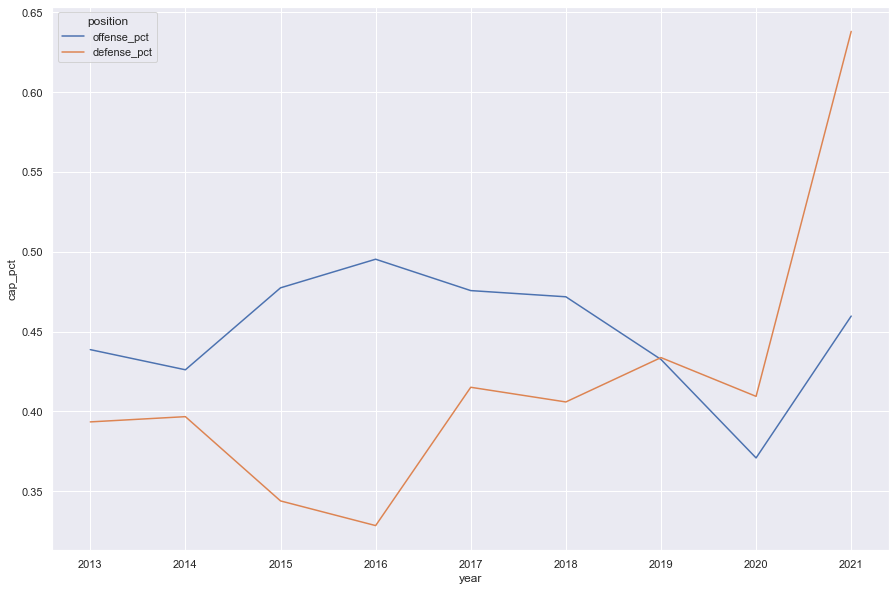

In [146]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=pats_long, x='year', y='cap_pct', hue='position');

In [73]:
team_avg_spending = df[['team', 'offense_pct', 'defense_pct']].groupby('team').mean().reset_index()
team_avg_spending['logo'] = os.getcwd() + '\\Logos\\' + team_avg_spending['team'].astype('str') + '.png'
team_avg_spending.head()

,team,offense_pct,defense_pct,logo
0,49ers,0.456171,0.393992,C:\Users\jaime.avendano\projects\NLF_Data\Sala...
1,Bears,0.463437,0.432593,C:\Users\jaime.avendano\projects\NLF_Data\Sala...
2,Bengals,0.445740,0.479979,C:\Users\jaime.avendano\projects\NLF_Data\Sala...
3,Bills,0.388025,0.449931,C:\Users\jaime.avendano\projects\NLF_Data\Sala...
4,Broncos,0.408136,0.478347,C:\Users\jaime.avendano\projects\NLF_Data\Sala...


In [85]:
df_2019_spending = df[df.year == 2019][['team', 'offense_pct', 'defense_pct']]
df_2019_spending['logo'] = os.getcwd() + '\\Logos\\' + df_2019_spending['team'].astype('str') + '.png'
df_2019_spending.head()

,team,offense_pct,defense_pct,logo
0,Packers,0.589464,0.291767,C:\Users\jaime.avendano\projects\NLF_Data\Sala...
1,Buccaneers,0.557365,0.365525,C:\Users\jaime.avendano\projects\NLF_Data\Sala...
2,Chargers,0.540319,0.376760,C:\Users\jaime.avendano\projects\NLF_Data\Sala...
3,Washington,0.520814,0.338157,C:\Users\jaime.avendano\projects\NLF_Data\Sala...
4,Bengals,0.517869,0.357125,C:\Users\jaime.avendano\projects\NLF_Data\Sala...


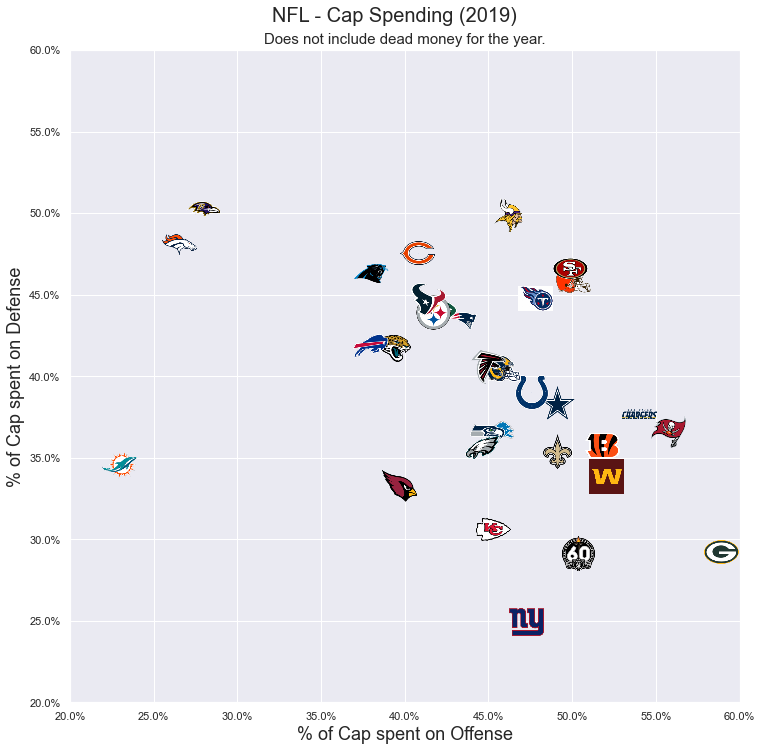

In [147]:
plt.figure(figsize=(12, 12))
sns.set_style('darkgrid')
ax = sns.scatterplot(data=df_2019_spending, x='offense_pct', y='defense_pct', s=0.1)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlim((0.2, 0.6))
plt.ylim((0.2, 0.6))


for x0, y0, path in zip(df_2019_spending.offense_pct, df_2019_spending.defense_pct, df_2019_spending.logo):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

plt.suptitle('NFL - Cap Spending (2019)', fontsize=20, y=0.93)
plt.title('Does not include dead money for the year.', fontsize=15)
plt.xlabel('% of Cap spent on Offense', fontsize=18)
plt.ylabel('% of Cap spent on Defense', fontsize=18)
plt.show()